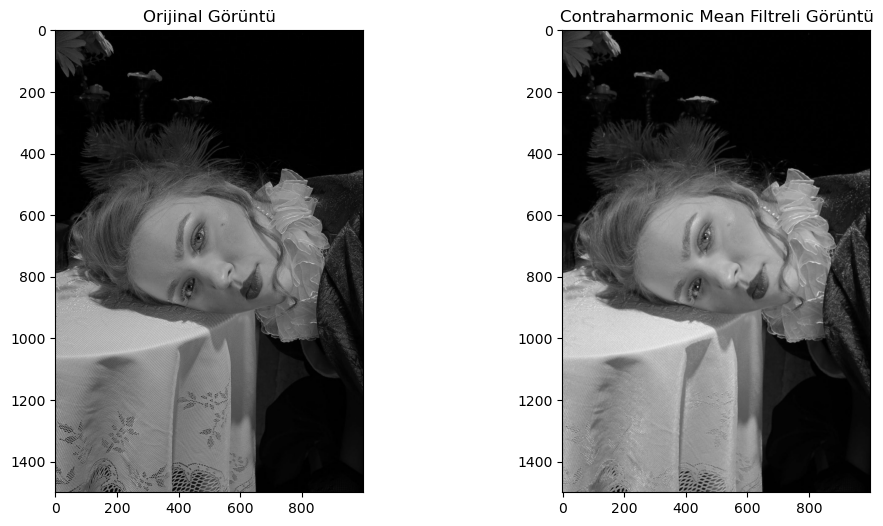

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contraharmonic_mean_filter(image, kernel_size, Q):
    padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)
    result_image = np.zeros_like(image, dtype=np.float32)

    for i in range(kernel_size//2, padded_image.shape[0] - kernel_size//2):
        for j in range(kernel_size//2, padded_image.shape[1] - kernel_size//2):
            neighborhood = padded_image[i - kernel_size//2:i + kernel_size//2 + 1, j - kernel_size//2:j + kernel_size//2 + 1]
            numerator = np.sum(np.power(neighborhood, Q + 1))
            denominator = np.sum(np.power(neighborhood, Q))
            result_image[i - kernel_size//2, j - kernel_size//2] = numerator / denominator if denominator != 0 else 0

    result_image = np.clip(result_image, 0, 255).astype(np.uint8)
    return result_image

# Örnek bir görüntü yükleme
image = cv2.imread(r'C:\Users\Beyza\Desktop\IP\img.jpg', cv2.IMREAD_GRAYSCALE)

# Contraharmonic Mean filtresini uygulama
filtered_image = contraharmonic_mean_filter(image, kernel_size=3, Q=1.5)

# Görüntüleri görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal Görüntü')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Contraharmonic Mean Filtreli Görüntü')

plt.show()